# Best Models for Heart Stroke Prediction

Tyson Ditner | 230147201 | ditner@unbc.ca

Noah Stobbe | 230140171 | stobbe@unbc.ca

CPSC499 - Applied Machine Learning

## References

1. Aurélien Géron, "Hands-On Machine Learning with Scikit-Learn & TensorFlow".

2. https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
import imblearn
#from google.colab import files, drive
#import gdown

In [66]:
raw_data = pd.read_csv("data/heart_disease.csv", sep=',')

In [67]:
orig_columns = raw_data.columns
orig_columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [68]:
# We will rename "Heart_ stroke" to "Heart Stroke" later; having a placeholder name now is useful to later easily force this column to the end of the DataFrame.
raw_data = raw_data.rename(columns={"age": "Age", "education": "Education", "currentSmoker": "Current Smoker", "cigsPerDay": "Cigarettes Per Day",
                                    "BPMeds": "Blood Pressure Medications", "prevalentStroke": "Prevalent Stroke", "prevalentHyp": "Prevalent Hypertension", 
                                    "diabetes": "Diabetes", "totChol": "Total Cholesterol", "sysBP": "Systolic Blood Pressure", "diaBP": "Diastolic Blood Pressure",
                                    "heartRate": "Heart Rate", "glucose": "Glucose"})

new_columns = raw_data.columns
new_columns

Index(['Gender', 'Age', 'Education', 'Current Smoker', 'Cigarettes Per Day',
       'Blood Pressure Medications', 'Prevalent Stroke',
       'Prevalent Hypertension', 'Diabetes', 'Total Cholesterol',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI',
       'Heart Rate', 'Glucose', 'Heart_ stroke'],
      dtype='object')

In [69]:
dTypes = ['object', 'int64', 'object', 'int64', 'float64', 'float64', 'object', 'int64', 'int64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'object']

pwd = os.getcwd()
filepath_raw_data_columns = os.path.join(pwd, "data\\raw_data_columns.csv")

raw_data_summary = pd.DataFrame()
raw_data_summary["Original Name"] = orig_columns
raw_data_summary["Original Name"][15] = "Heart\_ stroke"
raw_data_summary["Type"] = dTypes
raw_data_summary["Display Name"] = new_columns
raw_data_summary['Display Name'][15] = "Heart Stroke"
raw_data_summary.to_csv(filepath_raw_data_columns, index=False)
raw_data_summary

<>:8: SyntaxWarning: invalid escape sequence '\_'
<>:8: SyntaxWarning: invalid escape sequence '\_'
C:\Users\oah1s\AppData\Local\Temp\ipykernel_25952\1629929643.py:8: SyntaxWarning: invalid escape sequence '\_'
  raw_data_summary["Original Name"][15] = "Heart\_ stroke"
C:\Users\oah1s\AppData\Local\Temp\ipykernel_25952\1629929643.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.



,Original Name,Type,Display Name
0,Gender,object,Gender
1,age,int64,Age
2,education,object,Education
3,currentSmoker,int64,Current Smoker
4,cigsPerDay,float64,Cigarettes Per Day
5,BPMeds,float64,Blood Pressure Medications
6,prevalentStroke,object,Prevalent Stroke
7,prevalentHyp,int64,Prevalent Hypertension
8,diabetes,int64,Diabetes
9,totChol,float64,Total Cholesterol


In [70]:
raw_data.head()

,Gender,Age,Education,Current Smoker,Cigarettes Per Day,Blood Pressure Medications,Prevalent Stroke,Prevalent Hypertension,Diabetes,Total Cholesterol,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Heart Rate,Glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


'education' does not seem like a relevant heart disease predictor. We will drop this column.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Cigarettes Per Day', ylabel='Age'>,
        <Axes: xlabel='Total Cholesterol', ylabel='Age'>,
        <Axes: xlabel='Heart Rate', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Cigarettes Per Day'>,
        <Axes: xlabel='Cigarettes Per Day', ylabel='Cigarettes Per Day'>,
        <Axes: xlabel='Total Cholesterol', ylabel='Cigarettes Per Day'>,
        <Axes: xlabel='Heart Rate', ylabel='Cigarettes Per Day'>],
       [<Axes: xlabel='Age', ylabel='Total Cholesterol'>,
        <Axes: xlabel='Cigarettes Per Day', ylabel='Total Cholesterol'>,
        <Axes: xlabel='Total Cholesterol', ylabel='Total Cholesterol'>,
        <Axes: xlabel='Heart Rate', ylabel='Total Cholesterol'>],
       [<Axes: xlabel='Age', ylabel='Heart Rate'>,
        <Axes: xlabel='Cigarettes Per Day', ylabel='Heart Rate'>,
        <Axes: xlabel='Total Cholesterol', ylabel='Heart Rate'>,
        <Axes: xlabel='Heart Rate', ylabel='Heart Rate'>]], dty

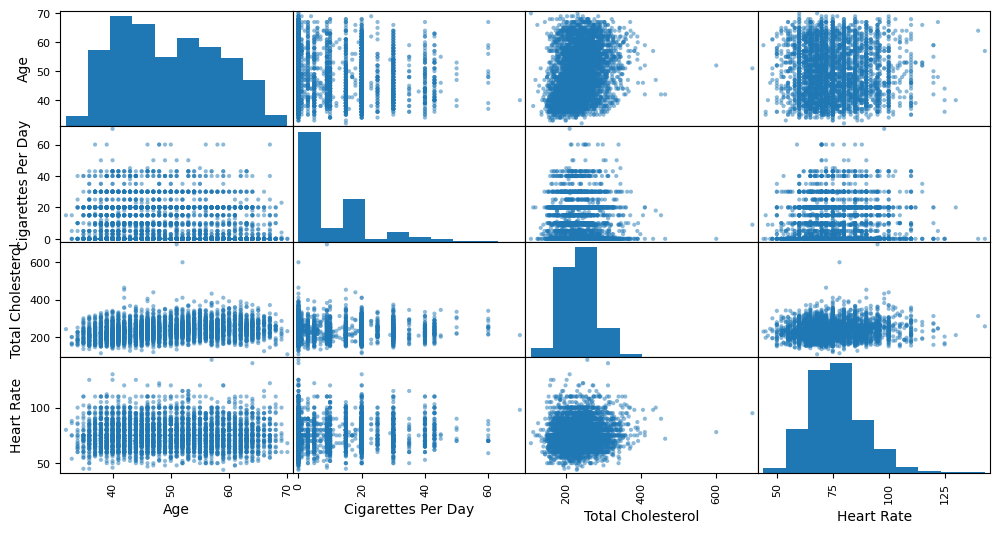

In [71]:
from pandas.plotting import scatter_matrix
attributes_scatter = ["Age", "Cigarettes Per Day", "Total Cholesterol", "Heart Rate"]
scatter_matrix(raw_data[attributes_scatter], figsize=(12, 6))

Check for null values

In [72]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      4238 non-null   object 
 1   Age                         4238 non-null   int64  
 2   Education                   4133 non-null   object 
 3   Current Smoker              4238 non-null   int64  
 4   Cigarettes Per Day          4209 non-null   float64
 5   Blood Pressure Medications  4185 non-null   float64
 6   Prevalent Stroke            4238 non-null   object 
 7   Prevalent Hypertension      4238 non-null   int64  
 8   Diabetes                    4238 non-null   int64  
 9   Total Cholesterol           4188 non-null   float64
 10  Systolic Blood Pressure     4238 non-null   float64
 11  Diastolic Blood Pressure    4238 non-null   float64
 12  BMI                         4219 non-null   float64
 13  Heart Rate                  4237 

'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' contain null values

In [73]:
raw_data.describe()

,Age,Current Smoker,Cigarettes Per Day,Blood Pressure Medications,Prevalent Hypertension,Diabetes,Total Cholesterol,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Heart Rate,Glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Preprocessing

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Encode non-numerical features numerically

class TransformEncoder(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    # Encode Gender and Geography as matrices with a single 1 per row
    def transform(self, X, y=None):

        one_hot_encoder = OneHotEncoder()

        # Encode "Gender"
        column_names = ["Female", "Male"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Gender']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['Female'] = X['Female'].astype('int64')
        X['Male'] = X['Male'].astype('int64')

        # Encode "prevalentStroke"
        column_names = ["No Prevalent Stroke", "Prevalent Stroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Prevalent Stroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['Prevalent Stroke'] = X['Prevalent Stroke'].astype('int64')
        X['No Prevalent Stroke'] = X['No Prevalent Stroke'].astype('int64')

        # Encode "Heart_ stroke"
        column_names = ["No Heart Stroke", "Heart Stroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Heart_ stroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['No Heart Stroke'] = X['No Heart Stroke'].astype('int64')
        X['Heart Stroke'] = X['Heart Stroke'].astype('int64')

        return X

In [75]:
class TransformImputer(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    def transform(self, X, y=None):
        simpleImputer1 = SimpleImputer(strategy="mean") # Strategy: fill null values in with mean values
        simpleImputer2 = SimpleImputer(strategy="most_frequent") # Strategy: majority vote
        X["Cigarettes Per Day"] = simpleImputer1.fit_transform(X[["Cigarettes Per Day"]]) # Fill null 'cigsPerDay' values with mean
        X["Blood Pressure Medications"] = simpleImputer1.fit_transform(X[["Blood Pressure Medications"]]) # Fill null 'BPMeds' values with mean
        X["Total Cholesterol"] = simpleImputer1.fit_transform(X[["Total Cholesterol"]]) # Fill null 'totChol' values with mean
        X["BMI"] = simpleImputer1.fit_transform(X[["BMI"]]) # Fill null 'BMI' values with mean
        X["Heart Rate"] = simpleImputer1.fit_transform(X[["Heart Rate"]]) # Fill null 'heartRate' values with mean
        X["Glucose"] = simpleImputer1.fit_transform(X[["Glucose"]]) # Fill null 'glucose' values with mean
        return X

In [76]:
class TransformDropper(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        return self
    
    # Drop the specified columns (not rows, hence axis=1):
    def transform(self, X, y=None):
        return X.drop(["Education", "Gender", "No Heart Stroke", "Heart_ stroke"], axis=1, errors="ignore")

In [77]:
from sklearn.pipeline import Pipeline

# Enable cleaning data to be accomplished with 1 command
clean_data = Pipeline([("transform_encoder", TransformEncoder()),
                       ("transform_imputer", TransformImputer()),
                       ("transform_dropper", TransformDropper())])
cleaned_data = clean_data.fit_transform(raw_data)
cleaned_data.head()

,Age,Current Smoker,Cigarettes Per Day,Blood Pressure Medications,Prevalent Stroke,Prevalent Hypertension,Diabetes,Total Cholesterol,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Heart Rate,Glucose,Female,Male,No Prevalent Stroke,Heart Stroke
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,1,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,1,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1,0,1,0


In [78]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4238 non-null   int64  
 1   Current Smoker              4238 non-null   int64  
 2   Cigarettes Per Day          4238 non-null   float64
 3   Blood Pressure Medications  4238 non-null   float64
 4   Prevalent Stroke            4238 non-null   int64  
 5   Prevalent Hypertension      4238 non-null   int64  
 6   Diabetes                    4238 non-null   int64  
 7   Total Cholesterol           4238 non-null   float64
 8   Systolic Blood Pressure     4238 non-null   float64
 9   Diastolic Blood Pressure    4238 non-null   float64
 10  BMI                         4238 non-null   float64
 11  Heart Rate                  4238 non-null   float64
 12  Glucose                     4238 non-null   float64
 13  Female                      4238 

In [79]:
cleaned_data["Heart Stroke"].describe()

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Heart Stroke, dtype: float64

<Axes: xlabel='Heart Stroke', ylabel='count'>

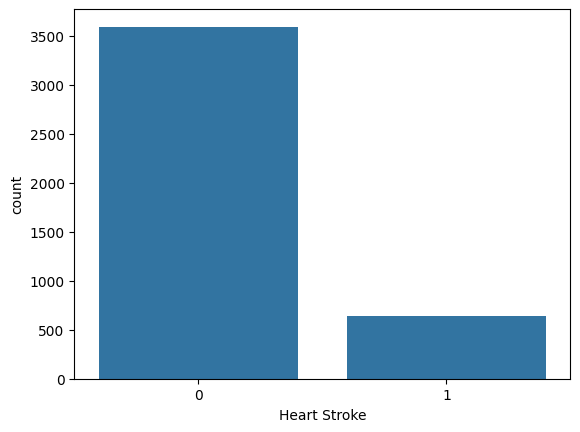

In [80]:
sns.countplot(x='Heart Stroke', data=cleaned_data)

<Axes: >

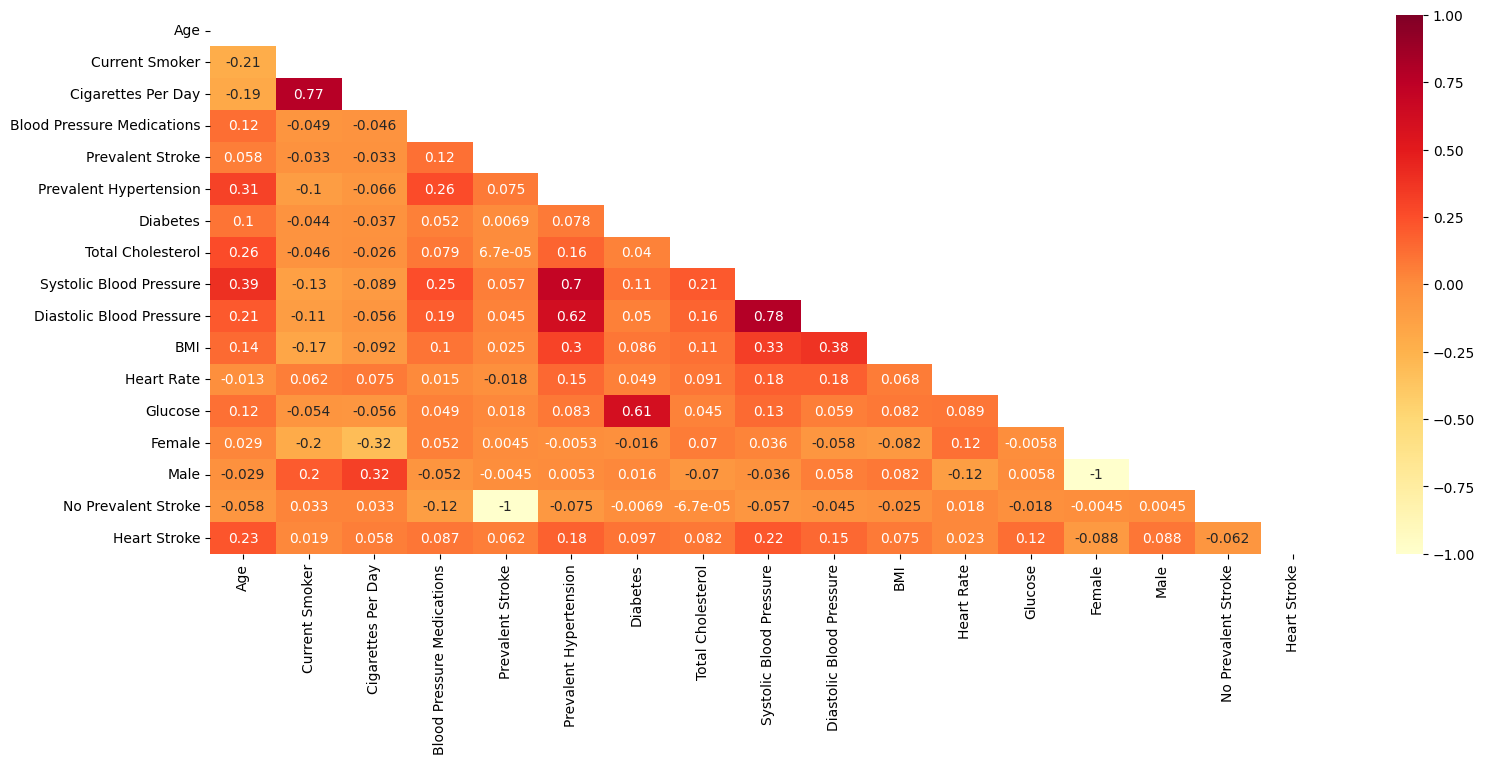

In [81]:
mask = np.triu(np.ones_like(cleaned_data.corr(numeric_only=True)))
plt.figure(figsize=(18,7))
sns.heatmap(cleaned_data.corr(numeric_only=True), cmap="YlOrRd", annot=True, mask=mask, vmin=-1, vmax=1)

## Model Building
### Split dataset

In [82]:
def get_X_y(data):

    X = data.drop(["Heart Stroke"], axis=1)
    y = data["Heart Stroke"]

    return X, y

<Axes: >

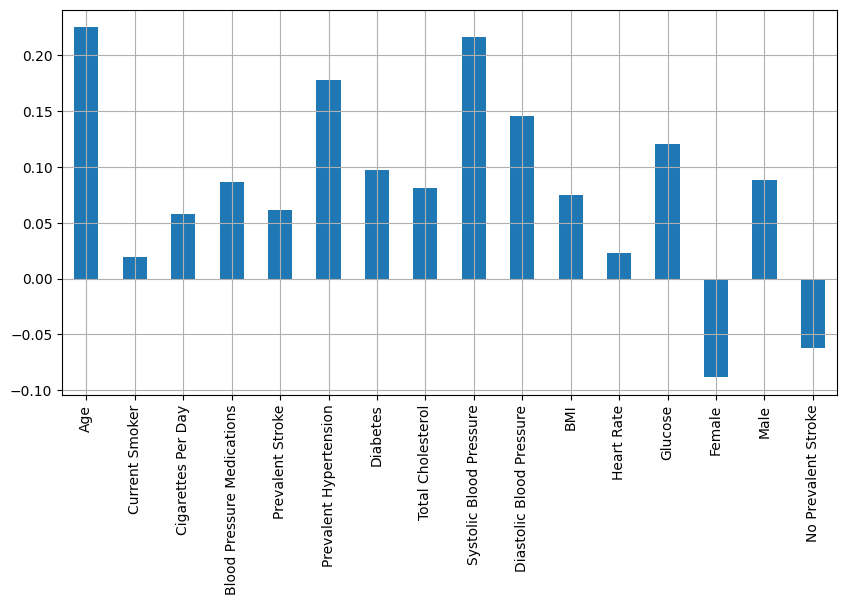

In [83]:
# Shuffle the data before splitting to reduce chance of abnormal distribution
cleaned_data = cleaned_data.sample(frac=1, random_state=0)

X, y = get_X_y(cleaned_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

X.corrwith(y).plot.bar(figsize = (10,5), rot = 90, grid = True)

In [84]:
train_stats = X_train.describe() # Get the mean of training data
train_stats = train_stats.transpose()

#### Normalization

In [85]:
def scale_X_y(X, y):
    X_data = (X - train_stats['mean']) / train_stats['std']
    y_data = y

    return X_data, y_data

In [86]:
X_train, y_train = scale_X_y(X_train, y_train)
X_test, y_test = scale_X_y(X_test, y_test)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 1690 to 2953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         3390 non-null   float64
 1   Current Smoker              3390 non-null   float64
 2   Cigarettes Per Day          3390 non-null   float64
 3   Blood Pressure Medications  3390 non-null   float64
 4   Prevalent Stroke            3390 non-null   float64
 5   Prevalent Hypertension      3390 non-null   float64
 6   Diabetes                    3390 non-null   float64
 7   Total Cholesterol           3390 non-null   float64
 8   Systolic Blood Pressure     3390 non-null   float64
 9   Diastolic Blood Pressure    3390 non-null   float64
 10  BMI                         3390 non-null   float64
 11  Heart Rate                  3390 non-null   float64
 12  Glucose                     3390 non-null   float64
 13  Female                      3390 no

### Training Data Oversampling

<Axes: xlabel='Heart Stroke', ylabel='count'>

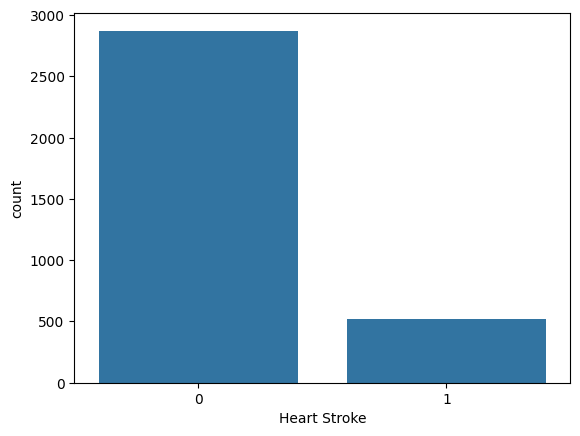

In [87]:
tmp_y_train_df = pd.DataFrame()
tmp_y_train_df["Heart Stroke"] = y_train
sns.countplot(x='Heart Stroke', data=tmp_y_train_df)

In [88]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)

<Axes: xlabel='Heart Stroke', ylabel='count'>

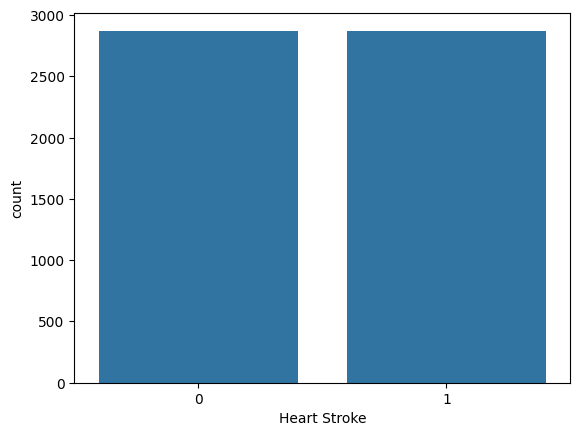

In [89]:
tmp_y_train_df = pd.DataFrame()
tmp_y_train_df["Heart Stroke"] = y_train
sns.countplot(x='Heart Stroke', data=tmp_y_train_df)

## Model Building and Prediction

In [19]:
def plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, myTitle, label=None):
    plt.plot(fpr_train, tpr_train, linewidth=2, label = "Train")
    plt.plot(fpr_test, tpr_test, linewidth=2, label = "Test")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.legend()
    plt.title(myTitle + " ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

### KNN

Bagging Classifier:

Train Accuracy: 0.9067177166724678
Test Accuracy: 0.6827830188679245
Train Precision: 0.8507955568898229
Test Precision: 0.2248062015503876
Train Recall: 0.9864253393665159
Test Recall: 0.4566929133858268
Train F1: 0.9136041263700838
Test F1: 0.3012987012987013
Train ROC Score: 0.9067177166724678
Test ROC Score: 0.5896502014918038
[[521 200]
 [ 69  58]]


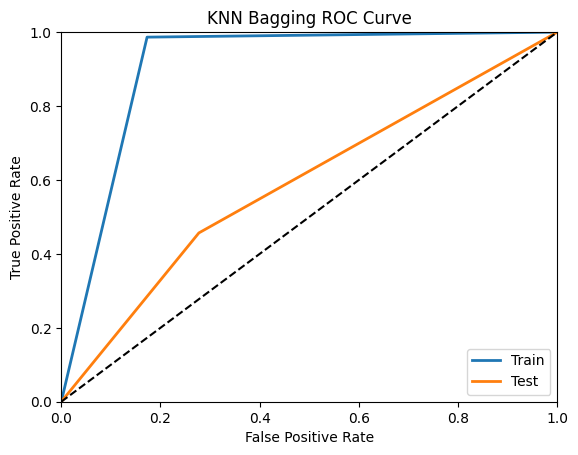

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

param_distribution_knn = [
    {'p': [0.5, 1.0, 1.5, 2.0], 'leaf_size': [20, 30, 40]}
]

knn = KNeighborsClassifier()
grid_search_knn = RandomizedSearchCV(knn, param_distribution_knn, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_knn = BaggingClassifier(estimator=grid_search_knn, random_state=0)

bag_knn.fit(X_train, y_train)
y_train_pred_knn_bag = bag_knn.predict(X_train)
y_test_pred_knn_bag = bag_knn.predict(X_test)

# Results
knn_bag_acc = metrics.accuracy_score(y_test, y_test_pred_knn_bag)
knn_bag_pre = metrics.precision_score(y_test, y_test_pred_knn_bag)
knn_bag_rec = metrics.recall_score(y_test, y_test_pred_knn_bag)
knn_bag_f1 = metrics.f1_score(y_test, y_test_pred_knn_bag)
knn_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_knn_bag)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_knn_bag))
print("Test Accuracy:", knn_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_knn_bag))
print("Test Precision:", knn_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_knn_bag))
print("Test Recall:", knn_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_knn_bag))
print("Test F1:", knn_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_knn_bag))
print("Test ROC Score:", knn_bag_roc)
print(confusion_matrix(y_test, y_test_pred_knn_bag))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_knn_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_knn_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "KNN Bagging")
plt.show()

### Logistic Regression

Bagging Classifier:

Train Accuracy: 0.6782109293421511
Test Accuracy: 0.6639150943396226
Train Precision: 0.6767955801104972
Test Precision: 0.26627218934911245
Train Recall: 0.6822137138879221
Test Recall: 0.7086614173228346
Train F1: 0.6794938464205235
Test F1: 0.3870967741935484
Train ROC Score: 0.6782109293421511
Test ROC Score: 0.6823473522120413
[[473 248]
 [ 37  90]]

Ada Boost Classifier:

Train Accuracy: 0.6552384267316395
Test Accuracy: 0.7110849056603774
Train Precision: 0.6779728651237031
Test Precision: 0.2846715328467153
Train Recall: 0.5913679081099895
Test Recall: 0.6141732283464567
Train F1: 0.6317159323294292
Test F1: 0.38902743142144636
Train ROC Score: 0.6552384267316393
Test ROC Score: 0.6711642840761409
[[525 196]
 [ 49  78]]


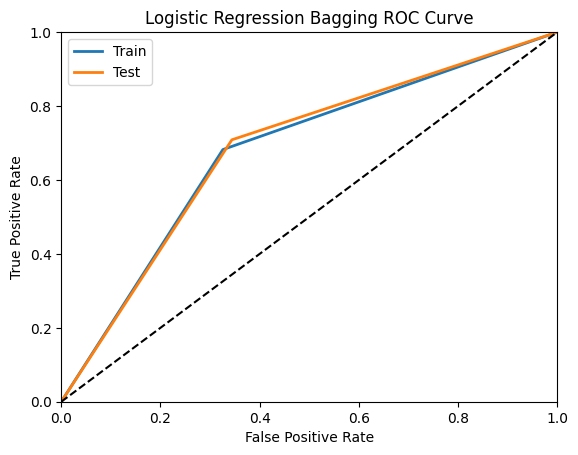

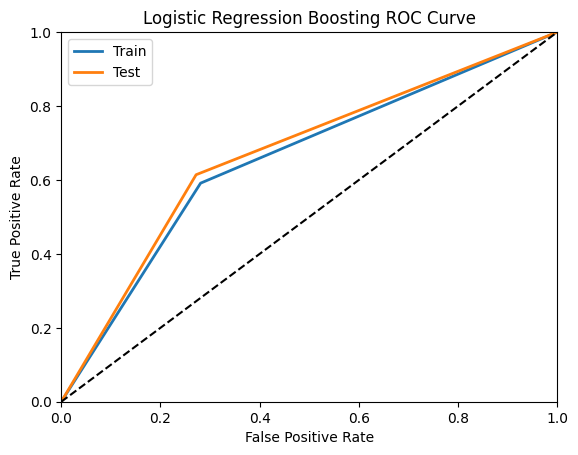

In [21]:
from sklearn.linear_model import LogisticRegression

param_distribution_logr = [
    {'C': [0.1, 1.0, 5.0, 10.0, 20.0]}
]

logr = LogisticRegression(random_state=0)
grid_search_logr = RandomizedSearchCV(logr, param_distribution_logr, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_logr = BaggingClassifier(estimator=grid_search_logr, random_state=0)

bag_logr.fit(X_train, y_train)
y_train_pred_logr_bag = bag_logr.predict(X_train)
y_test_pred_logr_bag = bag_logr.predict(X_test)

bst_logr = AdaBoostClassifier(estimator=logr, random_state=0, n_estimators=5, algorithm='SAMME')

bst_logr.fit(X_train, y_train)
y_train_pred_logr_bst = bst_logr.predict(X_train)
y_test_pred_logr_bst = bst_logr.predict(X_test)

# Results
logr_bag_acc = metrics.accuracy_score(y_test, y_test_pred_logr_bag)
logr_bag_pre = metrics.precision_score(y_test, y_test_pred_logr_bag)
logr_bag_rec = metrics.recall_score(y_test, y_test_pred_logr_bag)
logr_bag_f1 = metrics.f1_score(y_test, y_test_pred_logr_bag)
logr_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_logr_bag)

logr_bst_acc = metrics.accuracy_score(y_test, y_test_pred_logr_bst)
logr_bst_pre = metrics.precision_score(y_test, y_test_pred_logr_bst)
logr_bst_rec = metrics.recall_score(y_test, y_test_pred_logr_bst)
logr_bst_f1 = metrics.f1_score(y_test, y_test_pred_logr_bst)
logr_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_logr_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_logr_bag))
print("Test Accuracy:", logr_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_logr_bag))
print("Test Precision:", logr_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_logr_bag))
print("Test Recall:", logr_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_logr_bag))
print("Test F1:", logr_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_logr_bag))
print("Test ROC Score:", logr_bag_roc)
print(confusion_matrix(y_test, y_test_pred_logr_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_logr_bst))
print("Test Accuracy:", logr_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_logr_bst))
print("Test Precision:", logr_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_logr_bst))
print("Test Recall:", logr_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_logr_bst))
print("Test F1:", logr_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_logr_bst))
print("Test ROC Score:", logr_bst_roc)
print(confusion_matrix(y_test, y_test_pred_logr_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_logr_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_logr_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Logistic Regression Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_logr_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_logr_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Logistic Regression Boosting")
plt.show()

### Naïve Bayes

Bagging Classifier:

Train Accuracy: 0.5696136442742777
Test Accuracy: 0.8254716981132075
Train Precision: 0.7564102564102564
Test Precision: 0.36363636363636365
Train Recall: 0.2053602506091194
Test Recall: 0.2204724409448819
Train F1: 0.3230221735559814
Test F1: 0.27450980392156865
Train ROC Score: 0.5696136442742779
Test ROC Score: 0.5762556379481691
[[672  49]
 [ 99  28]]

Ada Boost Classifier:

Train Accuracy: 0.6018099547511312
Test Accuracy: 0.8030660377358491
Train Precision: 0.7572559366754618
Test Precision: 0.32142857142857145
Train Recall: 0.2996867386007657
Test Recall: 0.28346456692913385
Train F1: 0.42942643391521196
Test F1: 0.301255230125523
Train ROC Score: 0.6018099547511313
Test ROC Score: 0.5890277064881453
[[645  76]
 [ 91  36]]


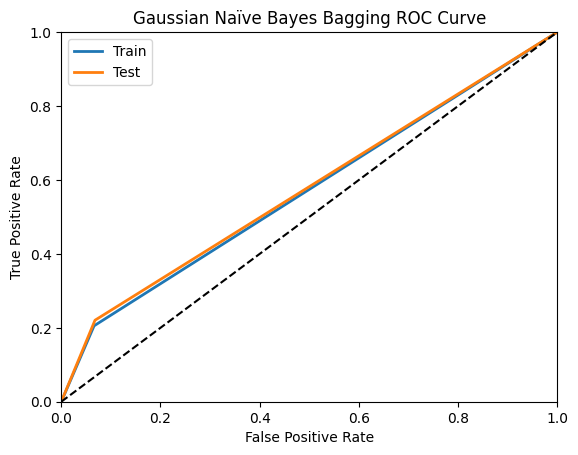

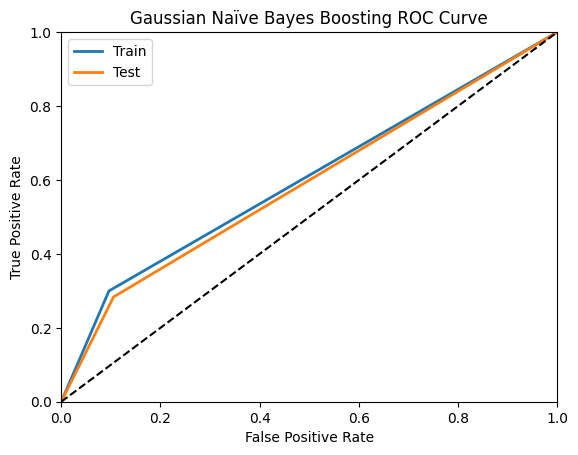

In [22]:
from sklearn.naive_bayes import GaussianNB

param_distribution_nb = [
    {'var_smoothing': [1e-10, 1e-9, 1e-8]}
]

nb = GaussianNB()
grid_search_nb = RandomizedSearchCV(nb, param_distribution_nb, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_nb = BaggingClassifier(estimator=grid_search_nb, random_state=0)

bag_nb.fit(X_train, y_train)
y_train_pred_nb_bag = bag_nb.predict(X_train)
y_test_pred_nb_bag = bag_nb.predict(X_test)

bst_nb = AdaBoostClassifier(estimator=nb, random_state=0, n_estimators=5, algorithm='SAMME')

bst_nb.fit(X_train, y_train)
y_train_pred_nb_bst = bst_nb.predict(X_train)
y_test_pred_nb_bst = bst_nb.predict(X_test)

# Results
nb_bag_acc = metrics.accuracy_score(y_test, y_test_pred_nb_bag)
nb_bag_pre = metrics.precision_score(y_test, y_test_pred_nb_bag)
nb_bag_rec = metrics.recall_score(y_test, y_test_pred_nb_bag)
nb_bag_f1 = metrics.f1_score(y_test, y_test_pred_nb_bag)
nb_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_nb_bag)

nb_bst_acc = metrics.accuracy_score(y_test, y_test_pred_nb_bst)
nb_bst_pre = metrics.precision_score(y_test, y_test_pred_nb_bst)
nb_bst_rec = metrics.recall_score(y_test, y_test_pred_nb_bst)
nb_bst_f1 = metrics.f1_score(y_test, y_test_pred_nb_bst)
nb_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_nb_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_nb_bag))
print("Test Accuracy:", nb_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_nb_bag))
print("Test Precision:", nb_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_nb_bag))
print("Test Recall:", nb_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_nb_bag))
print("Test F1:", nb_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_nb_bag))
print("Test ROC Score:", nb_bag_roc)
print(confusion_matrix(y_test, y_test_pred_nb_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_nb_bst))
print("Test Accuracy:", nb_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_nb_bst))
print("Test Precision:", nb_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_nb_bst))
print("Test Recall:", nb_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_nb_bst))
print("Test F1:", nb_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_nb_bst))
print("Test ROC Score:", nb_bst_roc)
print(confusion_matrix(y_test, y_test_pred_nb_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_nb_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_nb_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Gaussian Naïve Bayes Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_nb_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_nb_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Gaussian Naïve Bayes Boosting")
plt.show()

### Support Vector Classifier

Bagging Classifier:

Train Accuracy: 0.8311869126348764
Test Accuracy: 0.6933962264150944
Train Precision: 0.8164283338875956
Test Precision: 0.2145922746781116
Train Recall: 0.8545074834667595
Test Recall: 0.3937007874015748
Train F1: 0.8350340136054422
Test F1: 0.2777777777777778
Train ROC Score: 0.8311869126348765
Test ROC Score: 0.5699433201917721
[[538 183]
 [ 77  50]]

Ada Boost Classifier:

Train Accuracy: 0.6604594500522102
Test Accuracy: 0.6096698113207547
Train Precision: 0.6421961752004935
Test Precision: 0.23979591836734693
Train Recall: 0.7246780368952315
Test Recall: 0.7401574803149606
Train F1: 0.6809484873262469
Test F1: 0.3622350674373796
Train ROC Score: 0.6604594500522103
Test ROC Score: 0.663421319907827
[[423 298]
 [ 33  94]]


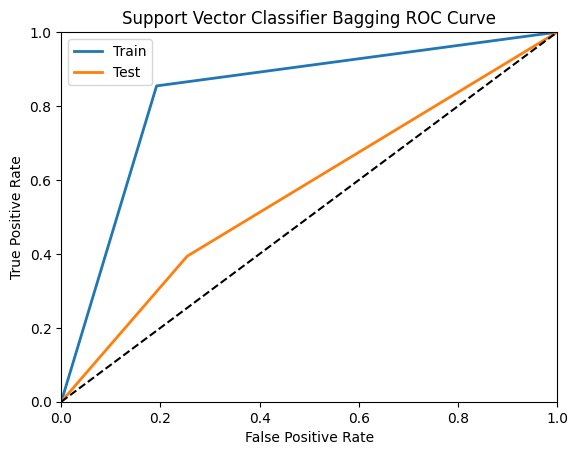

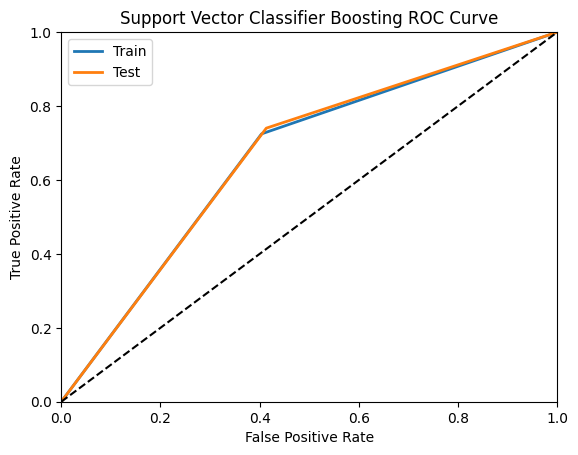

In [23]:
from sklearn.svm import SVC

param_distribution_svc = [
    {'C': [0.1, 1.0, 5.0, 10.0, 20.0]}
]

svc = SVC(random_state=0)
grid_search_svc = RandomizedSearchCV(svc, param_distribution_svc, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_svc = BaggingClassifier(estimator=grid_search_svc, random_state=0)

bag_svc.fit(X_train, y_train)
y_train_pred_svc_bag = bag_svc.predict(X_train)
y_test_pred_svc_bag = bag_svc.predict(X_test)

bst_svc = AdaBoostClassifier(estimator=svc, random_state=0, n_estimators=5, algorithm='SAMME')

bst_svc.fit(X_train, y_train)
y_train_pred_svc_bst = bst_svc.predict(X_train)
y_test_pred_svc_bst = bst_svc.predict(X_test)

# Results
svc_bag_acc = metrics.accuracy_score(y_test, y_test_pred_svc_bag)
svc_bag_pre = metrics.precision_score(y_test, y_test_pred_svc_bag)
svc_bag_rec = metrics.recall_score(y_test, y_test_pred_svc_bag)
svc_bag_f1 = metrics.f1_score(y_test, y_test_pred_svc_bag)
svc_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_svc_bag)

svc_bst_acc = metrics.accuracy_score(y_test, y_test_pred_svc_bst)
svc_bst_pre = metrics.precision_score(y_test, y_test_pred_svc_bst)
svc_bst_rec = metrics.recall_score(y_test, y_test_pred_svc_bst)
svc_bst_f1 = metrics.f1_score(y_test, y_test_pred_svc_bst)
svc_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_svc_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_svc_bag))
print("Test Accuracy:", svc_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_svc_bag))
print("Test Precision:", svc_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_svc_bag))
print("Test Recall:", svc_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_svc_bag))
print("Test F1:", svc_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_svc_bag))
print("Test ROC Score:", svc_bag_roc)
print(confusion_matrix(y_test, y_test_pred_svc_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_svc_bst))
print("Test Accuracy:", svc_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_svc_bst))
print("Test Precision:", svc_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_svc_bst))
print("Test Recall:", svc_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_svc_bst))
print("Test F1:", svc_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_svc_bst))
print("Test ROC Score:", svc_bst_roc)
print(confusion_matrix(y_test, y_test_pred_svc_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_svc_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_svc_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Support Vector Classifier Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_svc_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_svc_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Support Vector Classifier Boosting")
plt.show()

### Decision Tree Classifier

Bagging Classifier:

Train Accuracy: 0.9953010790114862
Test Accuracy: 0.7806603773584906
Train Precision: 0.9972047519217331
Test Precision: 0.2846715328467153
Train Recall: 0.9933867037939436
Test Recall: 0.30708661417322836
Train F1: 0.9952920662598082
Test F1: 0.29545454545454547
Train ROC Score: 0.9953010790114863
Test ROC Score: 0.5855821420380705
[[623  98]
 [ 88  39]]

Ada Boost Classifier:

Train Accuracy: 1.0
Test Accuracy: 0.7016509433962265
Train Precision: 1.0
Test Precision: 0.21100917431192662
Train Recall: 1.0
Test Recall: 0.36220472440944884
Train F1: 1.0
Test F1: 0.26666666666666666
Train ROC Score: 1.0
Test ROC Score: 0.5618235827317702
[[549 172]
 [ 81  46]]


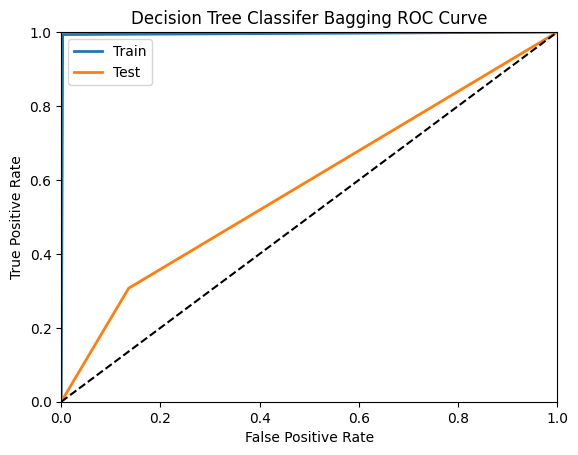

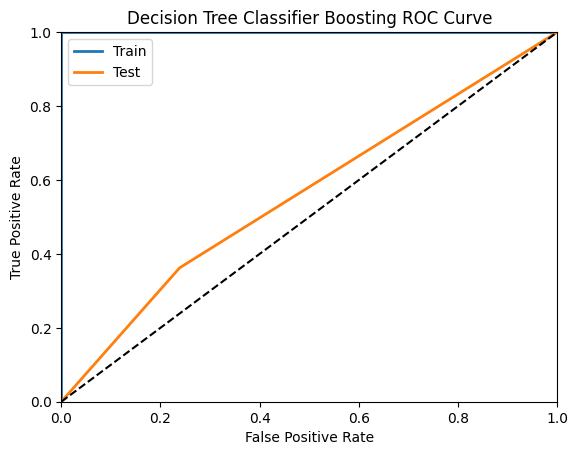

In [24]:
from sklearn.tree import DecisionTreeClassifier

param_distribution_dt = [
    {'criterion': ["gini", "entropy", "log_loss"]}
]

dt = DecisionTreeClassifier(random_state=0)
grid_search_dt = RandomizedSearchCV(dt, param_distribution_dt, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_dt = BaggingClassifier(estimator=grid_search_dt, random_state=0)

bag_dt.fit(X_train, y_train)
y_train_pred_dt_bag = bag_dt.predict(X_train)
y_test_pred_dt_bag = bag_dt.predict(X_test)

bst_dt = AdaBoostClassifier(estimator=dt, random_state=0, n_estimators=5, algorithm='SAMME')

bst_dt.fit(X_train, y_train)
y_train_pred_dt_bst = bst_dt.predict(X_train)
y_test_pred_dt_bst = bst_dt.predict(X_test)

# Results
dt_bag_acc = metrics.accuracy_score(y_test, y_test_pred_dt_bag)
dt_bag_pre = metrics.precision_score(y_test, y_test_pred_dt_bag)
dt_bag_rec = metrics.recall_score(y_test, y_test_pred_dt_bag)
dt_bag_f1 = metrics.f1_score(y_test, y_test_pred_dt_bag)
dt_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_dt_bag)

dt_bst_acc = metrics.accuracy_score(y_test, y_test_pred_dt_bst)
dt_bst_pre = metrics.precision_score(y_test, y_test_pred_dt_bst)
dt_bst_rec = metrics.recall_score(y_test, y_test_pred_dt_bst)
dt_bst_f1 = metrics.f1_score(y_test, y_test_pred_dt_bst)
dt_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_dt_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_dt_bag))
print("Test Accuracy:", dt_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_dt_bag))
print("Test Precision:", dt_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_dt_bag))
print("Test Recall:", dt_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_dt_bag))
print("Test F1:", dt_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_dt_bag))
print("Test ROC Score:", dt_bag_roc)
print(confusion_matrix(y_test, y_test_pred_dt_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_dt_bst))
print("Test Accuracy:", dt_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_dt_bst))
print("Test Precision:", dt_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_dt_bst))
print("Test Recall:", dt_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_dt_bst))
print("Test F1:", dt_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_dt_bst))
print("Test ROC Score:", dt_bst_roc)
print(confusion_matrix(y_test, y_test_pred_dt_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_dt_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_dt_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Decision Tree Classifer Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_dt_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_dt_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Decision Tree Classifier Boosting")
plt.show()

### Random Forest Classifier

Bagging Classifier:

Train Accuracy: 1.0
Test Accuracy: 0.785377358490566
Train Precision: 1.0
Test Precision: 0.28
Train Recall: 1.0
Test Recall: 0.2755905511811024
Train F1: 1.0
Test F1: 0.2777777777777778
Train ROC Score: 1.0
Test ROC Score: 0.5753819607500519
[[631  90]
 [ 92  35]]

Ada Boost Classifier:

Train Accuracy: 1.0
Test Accuracy: 0.7912735849056604
Train Precision: 1.0
Test Precision: 0.29508196721311475
Train Recall: 1.0
Test Recall: 0.28346456692913385
Train F1: 1.0
Test F1: 0.2891566265060241
Train ROC Score: 1.0
Test ROC Score: 0.5820928937280898
[[635  86]
 [ 91  36]]


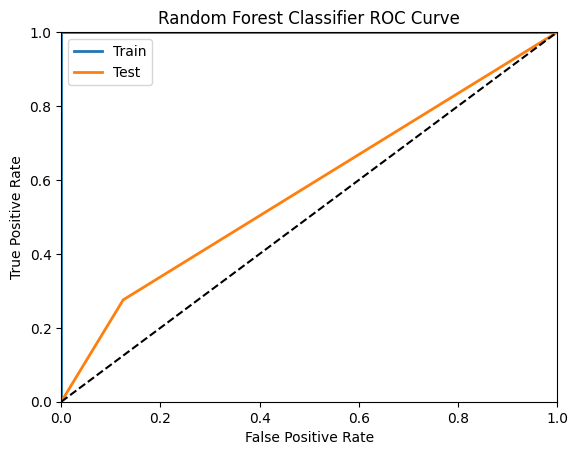

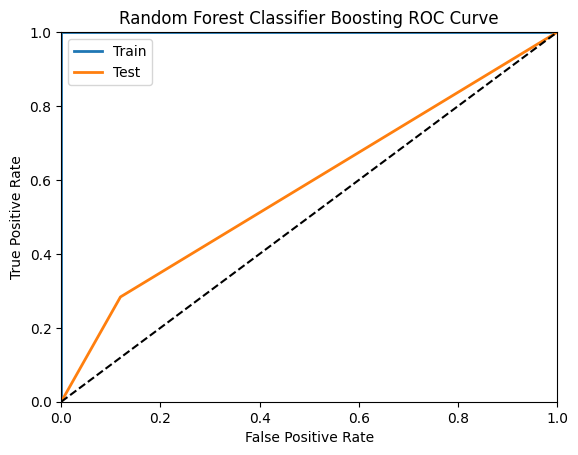

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_estimators=1000)

rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

bst_rf = AdaBoostClassifier(estimator=rf, random_state=0, n_estimators=5, algorithm='SAMME')

bst_rf.fit(X_train, y_train)
y_train_pred_rf_bst = bst_rf.predict(X_train)
y_test_pred_rf_bst = bst_rf.predict(X_test)

# Results
rf_acc = metrics.accuracy_score(y_test, y_test_pred_rf)
rf_pre = metrics.precision_score(y_test, y_test_pred_rf)
rf_rec = metrics.recall_score(y_test, y_test_pred_rf)
rf_f1 = metrics.f1_score(y_test, y_test_pred_rf)
rf_roc = metrics.roc_auc_score(y_test, y_test_pred_rf)

rf_bst_acc = metrics.accuracy_score(y_test, y_test_pred_rf_bst)
rf_bst_pre = metrics.precision_score(y_test, y_test_pred_rf_bst)
rf_bst_rec = metrics.recall_score(y_test, y_test_pred_rf_bst)
rf_bst_f1 = metrics.f1_score(y_test, y_test_pred_rf_bst)
rf_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_rf_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", rf_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_rf))
print("Test Precision:", rf_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_rf))
print("Test Recall:", rf_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_rf))
print("Test F1:", rf_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_rf))
print("Test ROC Score:", rf_roc)
print(confusion_matrix(y_test, y_test_pred_rf))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_rf_bst))
print("Test Accuracy:", rf_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_rf_bst))
print("Test Precision:", rf_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_rf_bst))
print("Test Recall:", rf_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_rf_bst))
print("Test F1:", rf_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_rf_bst))
print("Test ROC Score:", rf_bst_roc)
print(confusion_matrix(y_test, y_test_pred_rf_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_rf)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_rf)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Random Forest Classifier")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_rf_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_rf_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Random Forest Classifier Boosting")
plt.show()

## Model Evaluation
Here we obtain a bar chart of the mean accuracy, precision, recall, f1 score, and area under ROC curve across 5-fold cross validation 
over the entire dataset for all models.

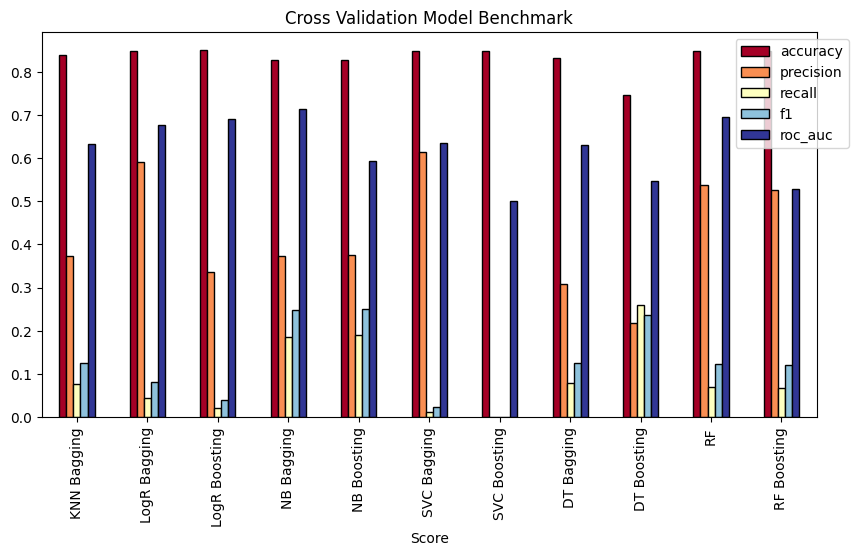

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from functools import reduce

def bar_chart_cv_score(X, y, models, scoring_list, cv = 5, refit = False): 
    names, mean_score = list(), list()
    models_score_list = list()
    mnames = list()
    
    for name, model in models:
    
        if refit:
            model.fit(X, y)
                
        for metric in scoring_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))
    
        tmp = pd.DataFrame({name: mean_score}, index = scoring_list)
        models_score_list.append(tmp)
        mean_score = list()

    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), models_score_list)
    frame_scores = frame_scores.T
    
    fig, ax = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(bbox_to_anchor=(1.05, 1), loc = 'upper right')
    ax.set_xlabel("Score")
    ax.set_title("Cross Validation Model Benchmark")

models = [['KNN Bagging', bag_knn], ['LogR Bagging', bag_logr], ['LogR Boosting', bst_logr], ['NB Bagging', bag_nb], ['NB Boosting', bst_nb], 
          ['SVC Bagging', bag_svc], ['SVC Boosting', bst_svc], ['DT Bagging', bag_dt], ['DT Boosting', bst_dt], ['RF', rf], ['RF Boosting', bst_rf]]
bar_chart_cv_score(X, y, models, ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [27]:
def round_decimal_list(list):
    new_list = []
    for a in list:
        b = str(round(a, 3))
        new_list.append(b)
    return new_list

### Summary CSV

Here we obtain a CSV that compactly summarizes the scores of each model we used.

In [28]:
pwd = os.getcwd()
filepath_summary = os.path.join(pwd, "data\\summary.csv")

base_model_column = ["KNN", "LR", "LR", "NB", "NB", "SVC", 
                     "SVC", "DT", "DT", "RFC", "RFC"]
ensemble_type_column = ["Bagging", "Bagging", "Boosting", "Bagging", "Boosting", "Bagging", "Boosting", "Bagging", "Boosting", "Singular", "Boosting"]
accuracy_column = [knn_bag_acc, logr_bag_acc, logr_bst_acc, nb_bag_acc, nb_bst_acc, svc_bag_acc, svc_bst_acc, dt_bag_acc, dt_bst_acc, rf_acc, rf_bst_acc]
precision_column = [knn_bag_pre, logr_bag_pre, logr_bst_pre, nb_bag_pre, nb_bst_pre, svc_bag_pre, svc_bst_pre, dt_bag_pre, dt_bst_pre, rf_pre, rf_bst_pre]
recall_column = [knn_bag_rec, logr_bag_rec, logr_bst_rec, nb_bag_rec, nb_bst_rec, svc_bag_rec, svc_bst_rec, dt_bag_rec, dt_bst_rec, rf_rec, rf_bst_rec]
f1_column = [knn_bag_f1, logr_bag_f1, logr_bst_f1, nb_bag_f1, nb_bst_f1, svc_bag_f1, svc_bst_f1, dt_bag_f1, dt_bst_f1, rf_f1, rf_bst_f1]
roc_column = [knn_bag_roc, logr_bag_roc, logr_bst_roc, nb_bag_roc, nb_bst_roc, svc_bag_roc, svc_bst_roc, dt_bag_roc, dt_bst_roc, rf_roc, rf_bst_roc]
df_summary = pd.DataFrame()
df_summary["Base"] = base_model_column
df_summary["Ensemble"] = ensemble_type_column
df_summary["Accuracy"] = round_decimal_list(accuracy_column)
df_summary["Precision"] = round_decimal_list(precision_column)
df_summary["Recall"] = round_decimal_list(recall_column)
df_summary["F1"] = round_decimal_list(f1_column)
df_summary["ROC AUC"] = round_decimal_list(roc_column)
df_summary.to_csv(filepath_summary, index=False)
df_summary

,Base,Ensemble,Accuracy,Precision,Recall,F1,ROC AUC
0,KNN,Bagging,0.683,0.225,0.457,0.301,0.59
1,LR,Bagging,0.664,0.266,0.709,0.387,0.682
2,LR,Boosting,0.711,0.285,0.614,0.389,0.671
3,NB,Bagging,0.825,0.364,0.22,0.275,0.576
4,NB,Boosting,0.803,0.321,0.283,0.301,0.589
5,SVC,Bagging,0.693,0.215,0.394,0.278,0.57
6,SVC,Boosting,0.61,0.24,0.74,0.362,0.663
7,DT,Bagging,0.781,0.285,0.307,0.295,0.586
8,DT,Boosting,0.702,0.211,0.362,0.267,0.562
9,RFC,Singular,0.785,0.28,0.276,0.278,0.575
